<a href="https://colab.research.google.com/github/asd3656/AI_12_cp2/blob/main/CP2_%EC%86%A1%EB%82%98%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/CP2_project/2019-Oct.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [7]:
df[df['category_code'] == 'computers.notebook']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
18,2019-10-01 00:00:19 UTC,view,1306631,2053013558920217191,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
64,2019-10-01 00:00:50 UTC,view,1307135,2053013558920217191,computers.notebook,hp,320.35,542378517,244570b9-ebb4-4d4a-b63a-653225d975d5
77,2019-10-01 00:01:05 UTC,view,1306083,2053013558920217191,computers.notebook,hp,1512.78,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
78,2019-10-01 00:01:06 UTC,view,1307004,2053013558920217191,computers.notebook,lenovo,290.61,542378517,244570b9-ebb4-4d4a-b63a-653225d975d5
...,...,...,...,...,...,...,...,...,...
42448683,2019-10-31 23:59:26 UTC,view,1306686,2053013558920217191,computers.notebook,prestigio,257.38,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
42448688,2019-10-31 23:59:27 UTC,view,1307350,2053013558920217191,computers.notebook,acer,514.79,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726
42448703,2019-10-31 23:59:34 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
42448729,2019-10-31 23:59:47 UTC,view,1307489,2053013558920217191,computers.notebook,xiaomi,715.33,530857208,c69f9c63-7098-426c-97d9-8cb94a0a1083


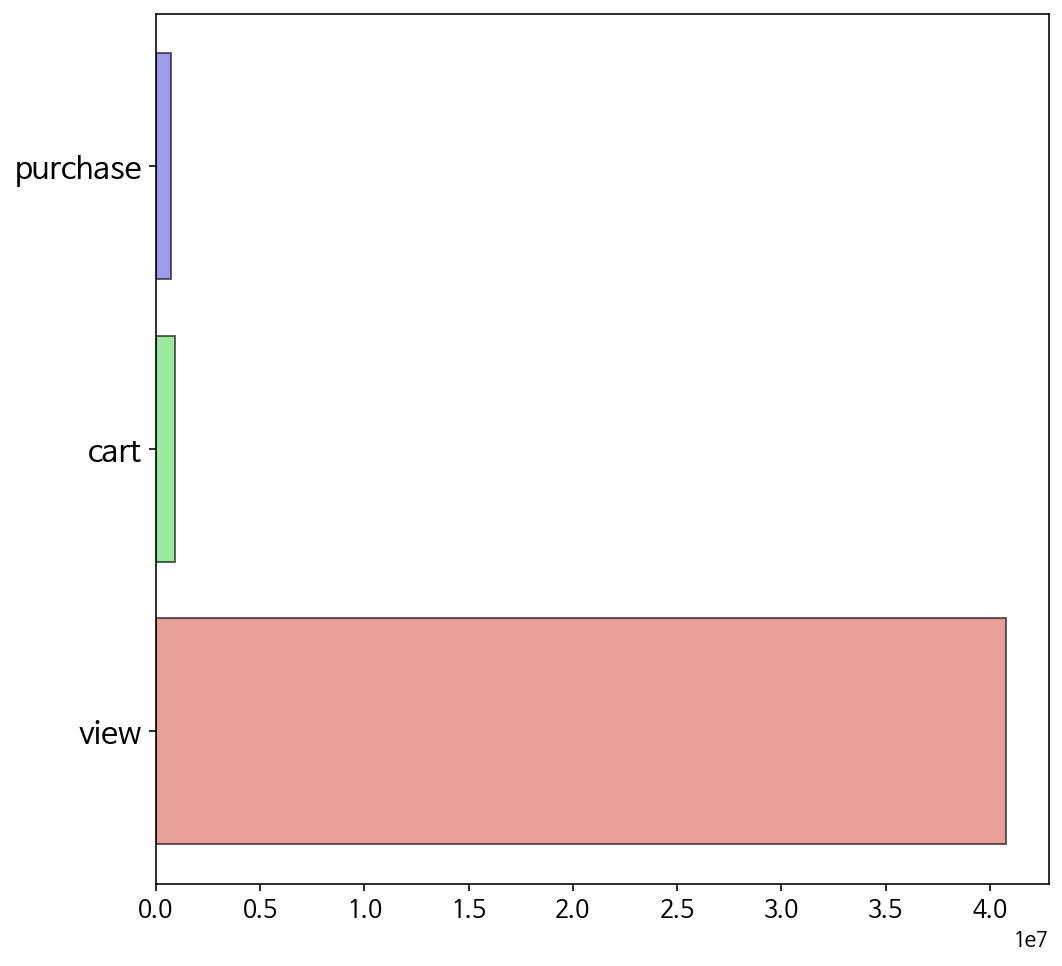

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
nation_data = Counter(df['event_type']).most_common() ## 데이터 개수가 많은 순으로 출력
nation_data = nation_data[:3] ## 상위 3개만 저장
 
data = [x[1] for x in nation_data] ## 데이터 개수
nations = [x[0] for x in nation_data] ## event_type
 
## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정
 
plt.barh(nations, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

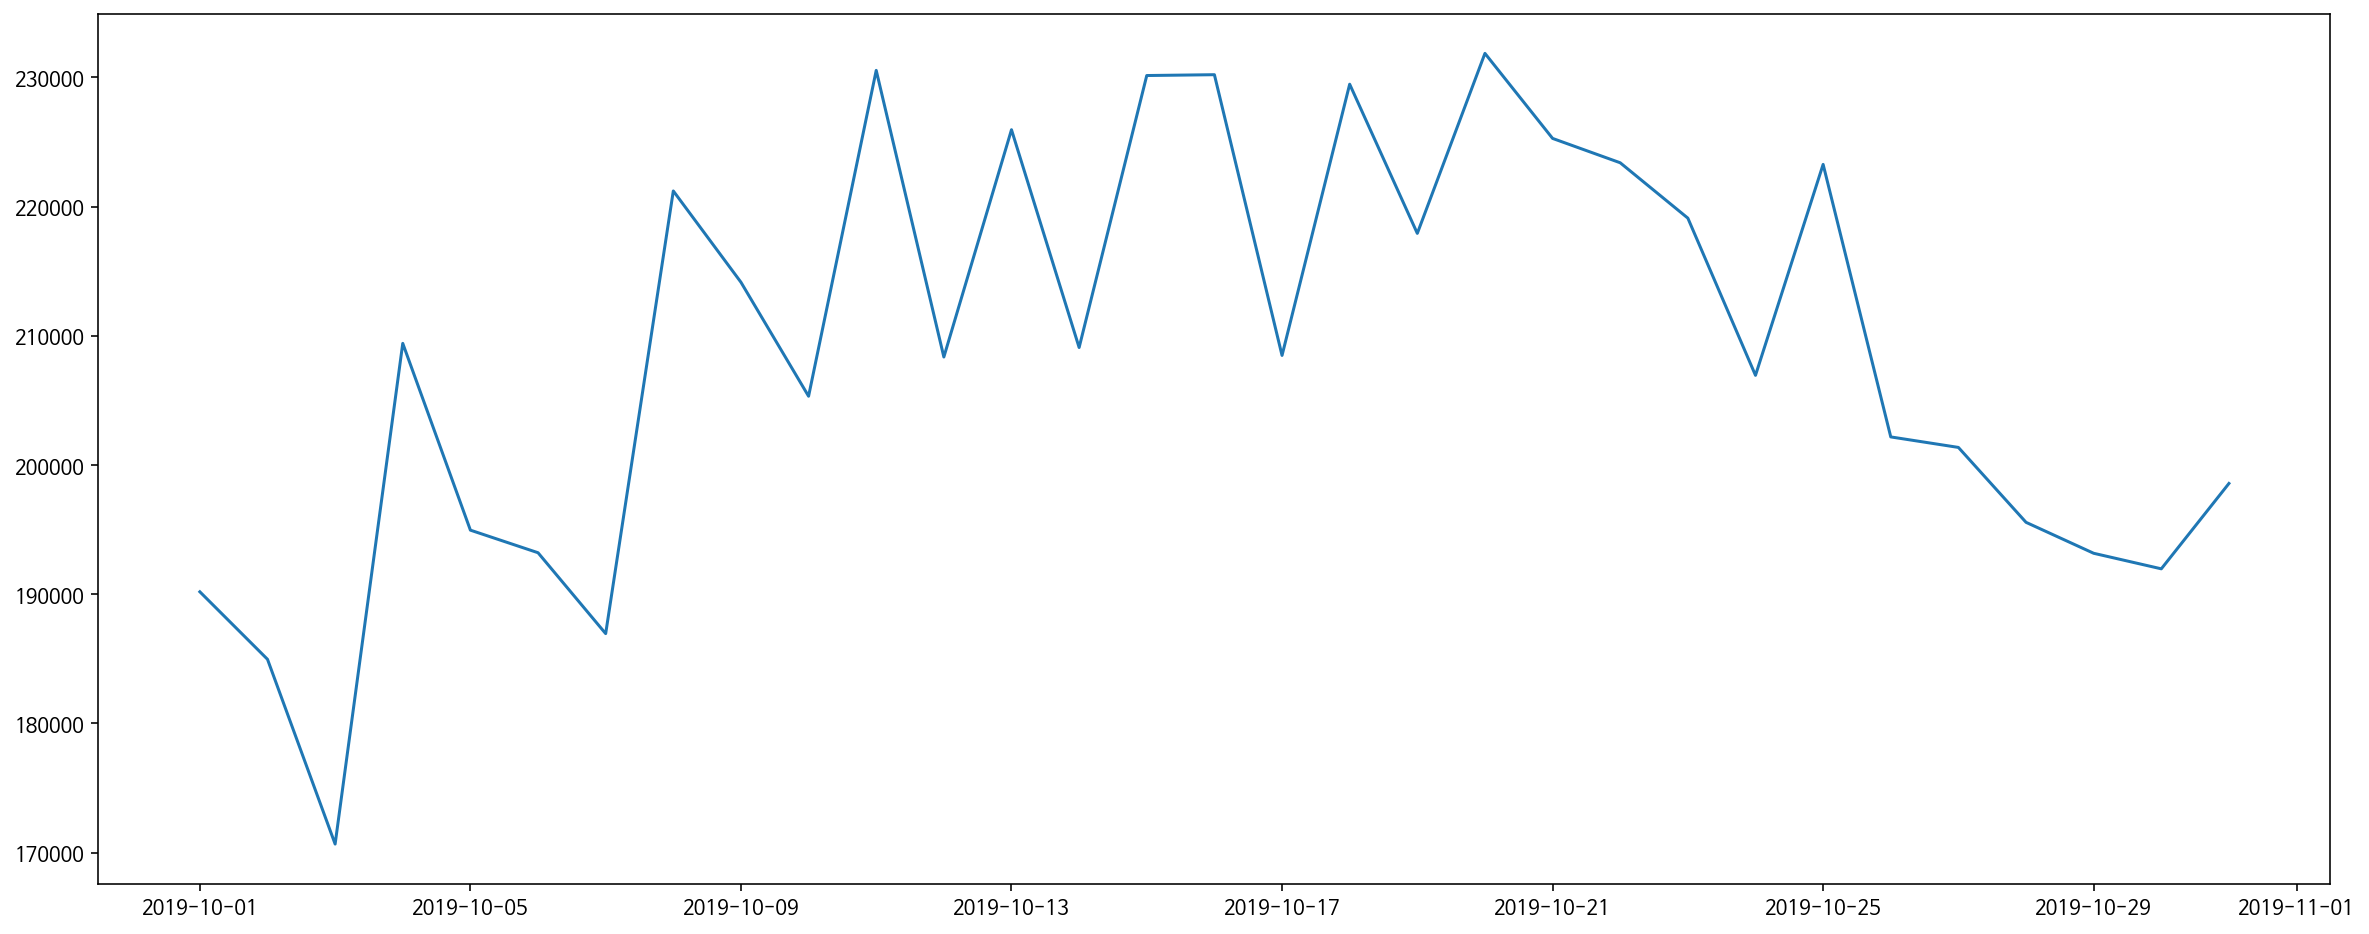

In [9]:
from datetime import datetime

# 날짜별 방문자 수
data = df.loc[:,['event_time','user_id']]

#날짜만 추출
data['event_time'] = data['event_time'].apply(lambda x: str(x)[0:10])
visitor_by_date = data.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

In [10]:
df['brand'].value_counts()

samsung         5282775
apple           4122554
xiaomi          3083763
huawei          1111205
lucente          655861
                 ...   
nec                   1
neocoregames          1
incase                1
portdesigns           1
skindoctors           1
Name: brand, Length: 3444, dtype: int64

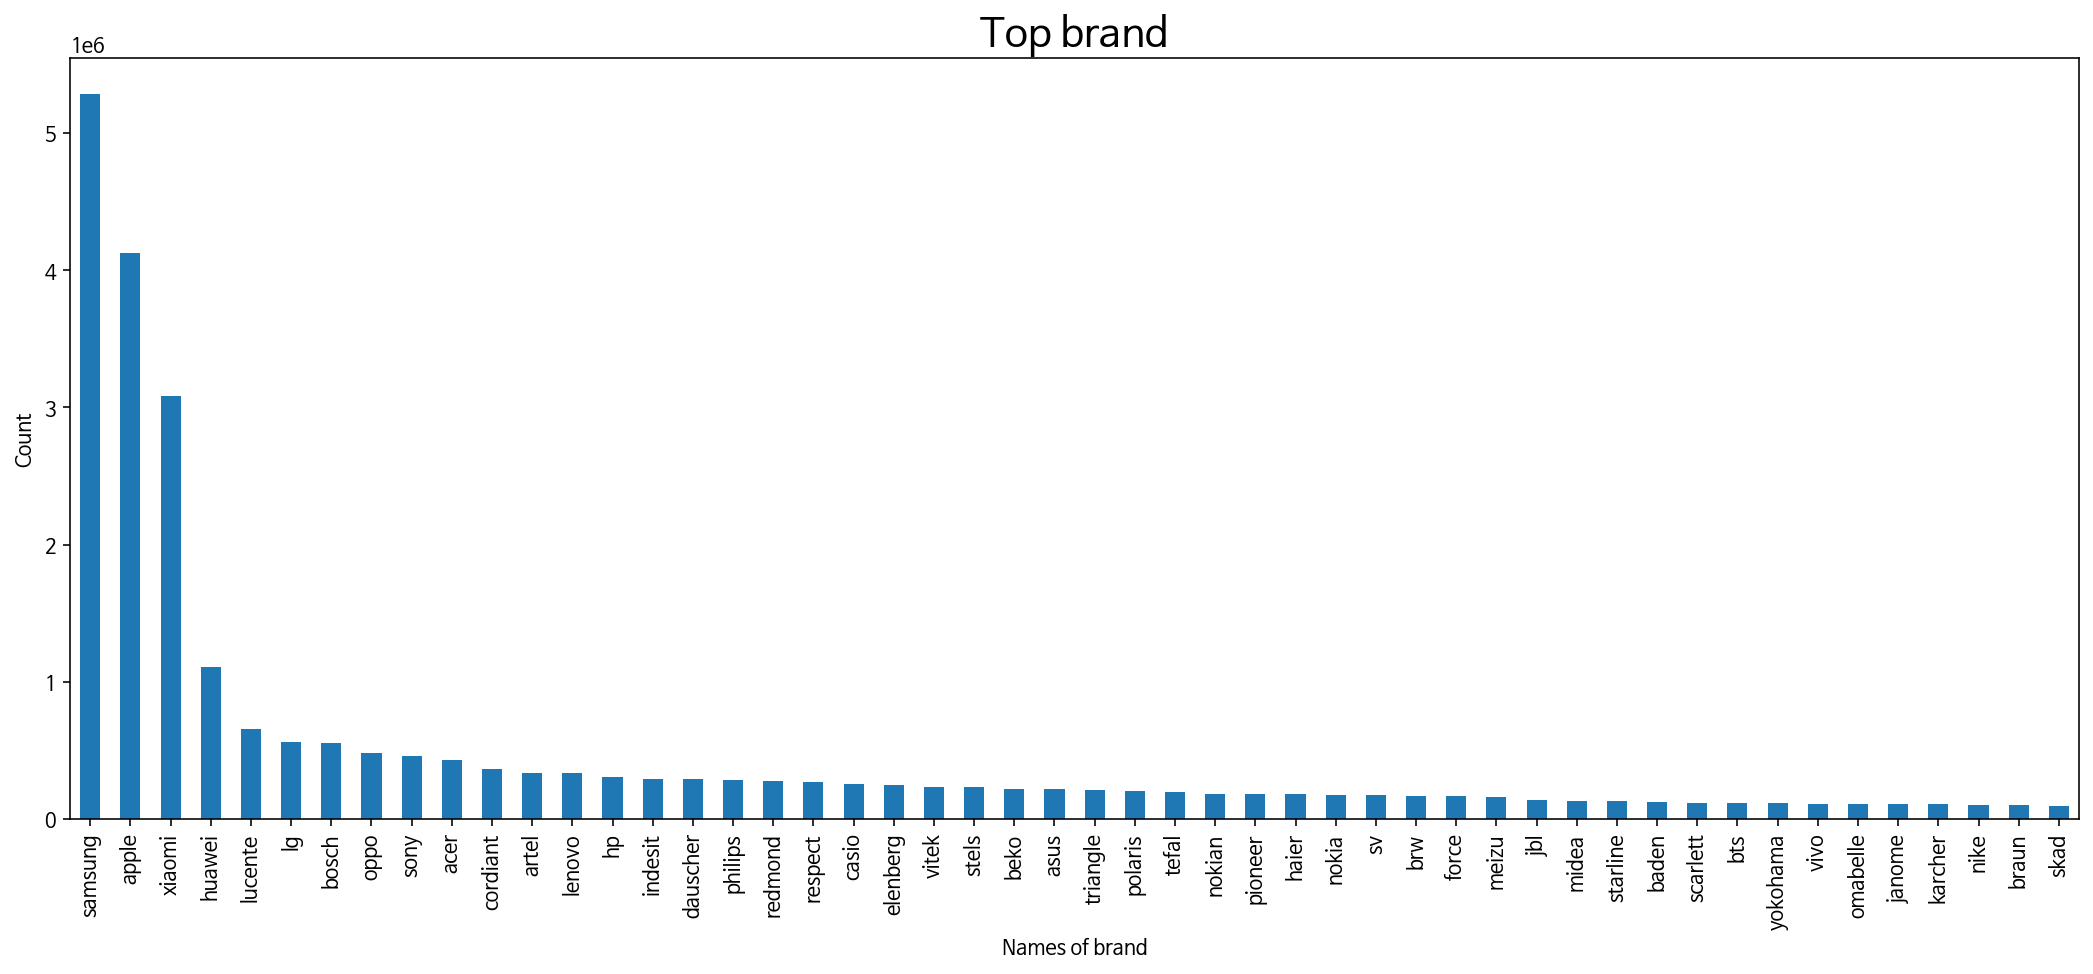

In [11]:
#모든 event type의 브랜드별 판매순위
df['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

In [12]:
purchase_df = df.loc[df['event_type'].isin(['purchase'])]
purchase_df.duplicated().sum()

76

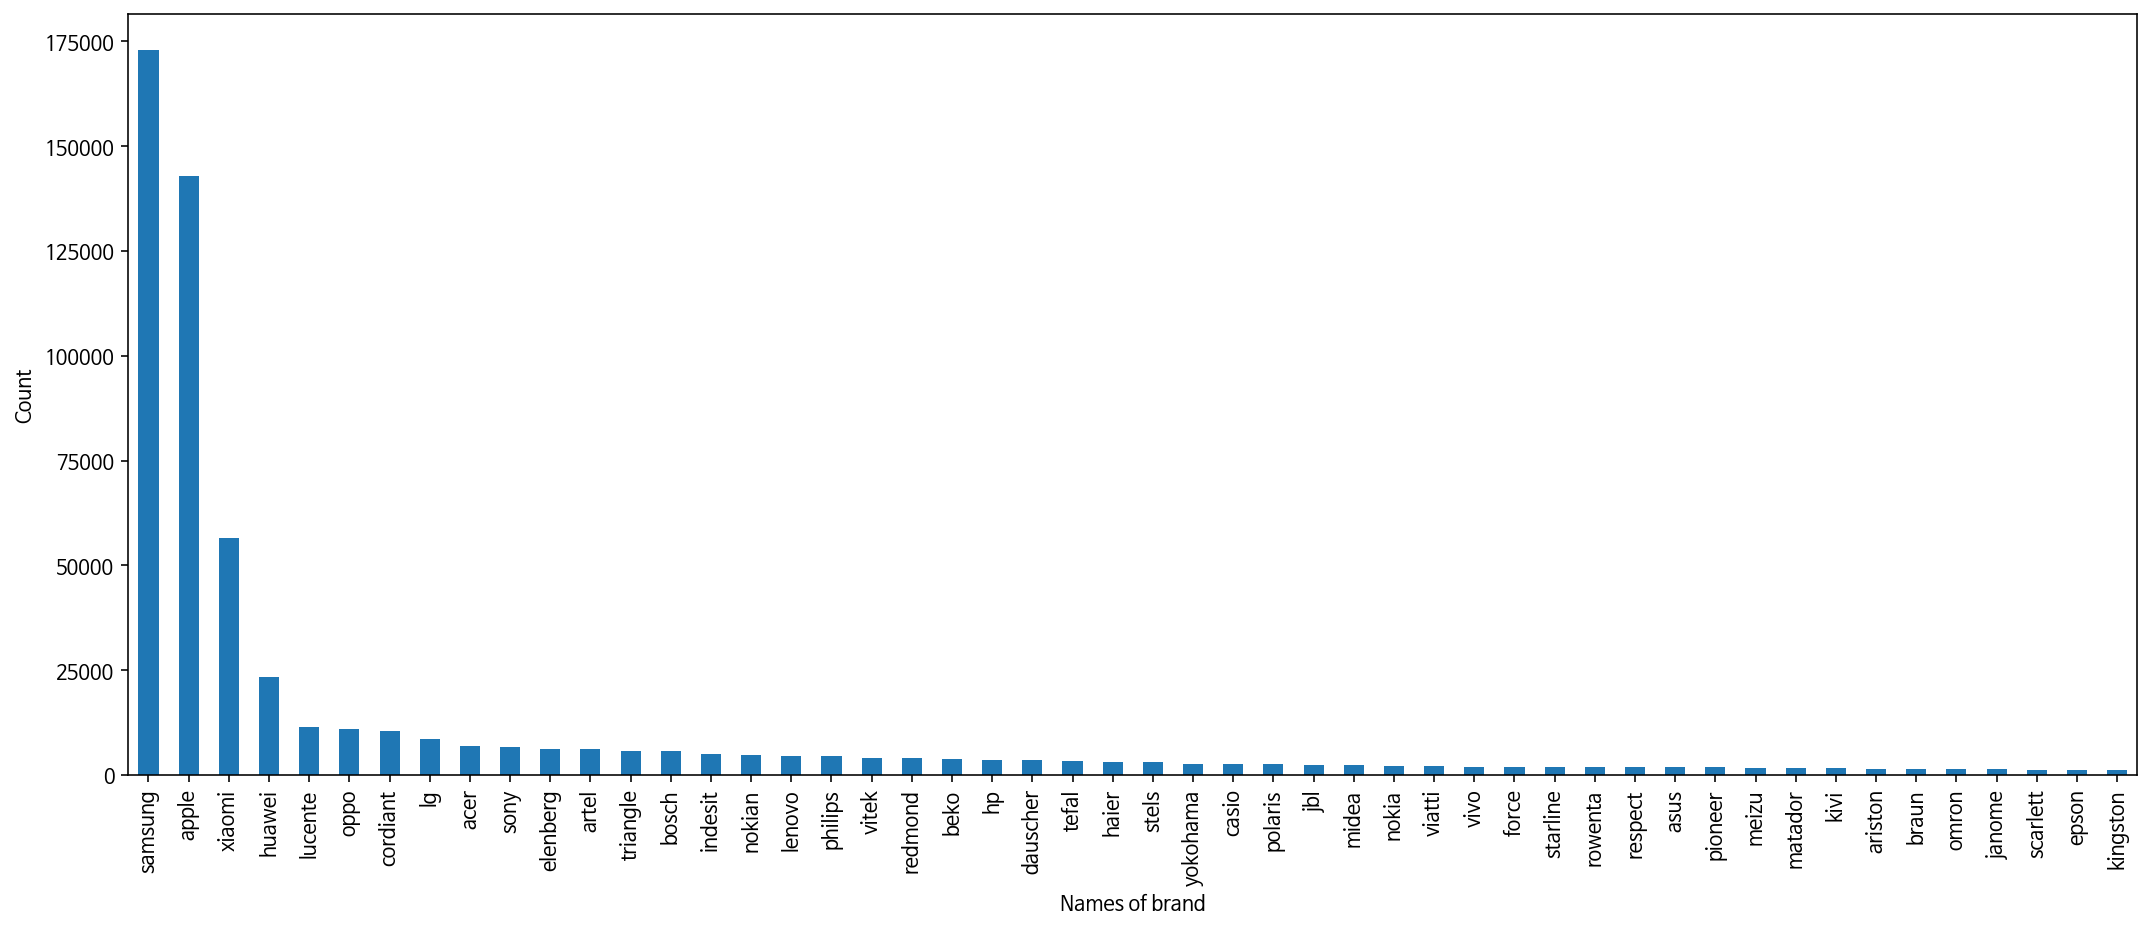

In [13]:
# event_type => purchase인 것 중에서 브랜드별 판매순위
purchase_df = purchase_df.drop_duplicates()
purchase_df['brand'].value_counts().head(50).plot.bar(figsize =(18,7))
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

In [14]:
# total => event_time, event_type의 중복 개수
day =['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
event_type_df = df.groupby(['event_time','event_type']).size().reset_index(name = 'total')
event_type_df

,event_time,event_type,total
0,2019-10-01 00:00:00 UTC,view,2
1,2019-10-01 00:00:01 UTC,view,2
2,2019-10-01 00:00:04 UTC,view,1
3,2019-10-01 00:00:05 UTC,view,1
4,2019-10-01 00:00:08 UTC,view,2
...,...,...,...
3943185,2019-10-31 23:59:55 UTC,view,3
3943186,2019-10-31 23:59:56 UTC,view,2
3943187,2019-10-31 23:59:57 UTC,view,2
3943188,2019-10-31 23:59:58 UTC,view,7


In [15]:
purchases = event_type_df.loc[event_type_df.event_type == 'purchase'] 
cart = event_type_df.loc[event_type_df.event_type == 'cart']
view = event_type_df.loc[event_type_df.event_type == 'view']

In [16]:
view.head()

,event_time,event_type,total
0,2019-10-01 00:00:00 UTC,view,2
1,2019-10-01 00:00:01 UTC,view,2
2,2019-10-01 00:00:04 UTC,view,1
3,2019-10-01 00:00:05 UTC,view,1
4,2019-10-01 00:00:08 UTC,view,2


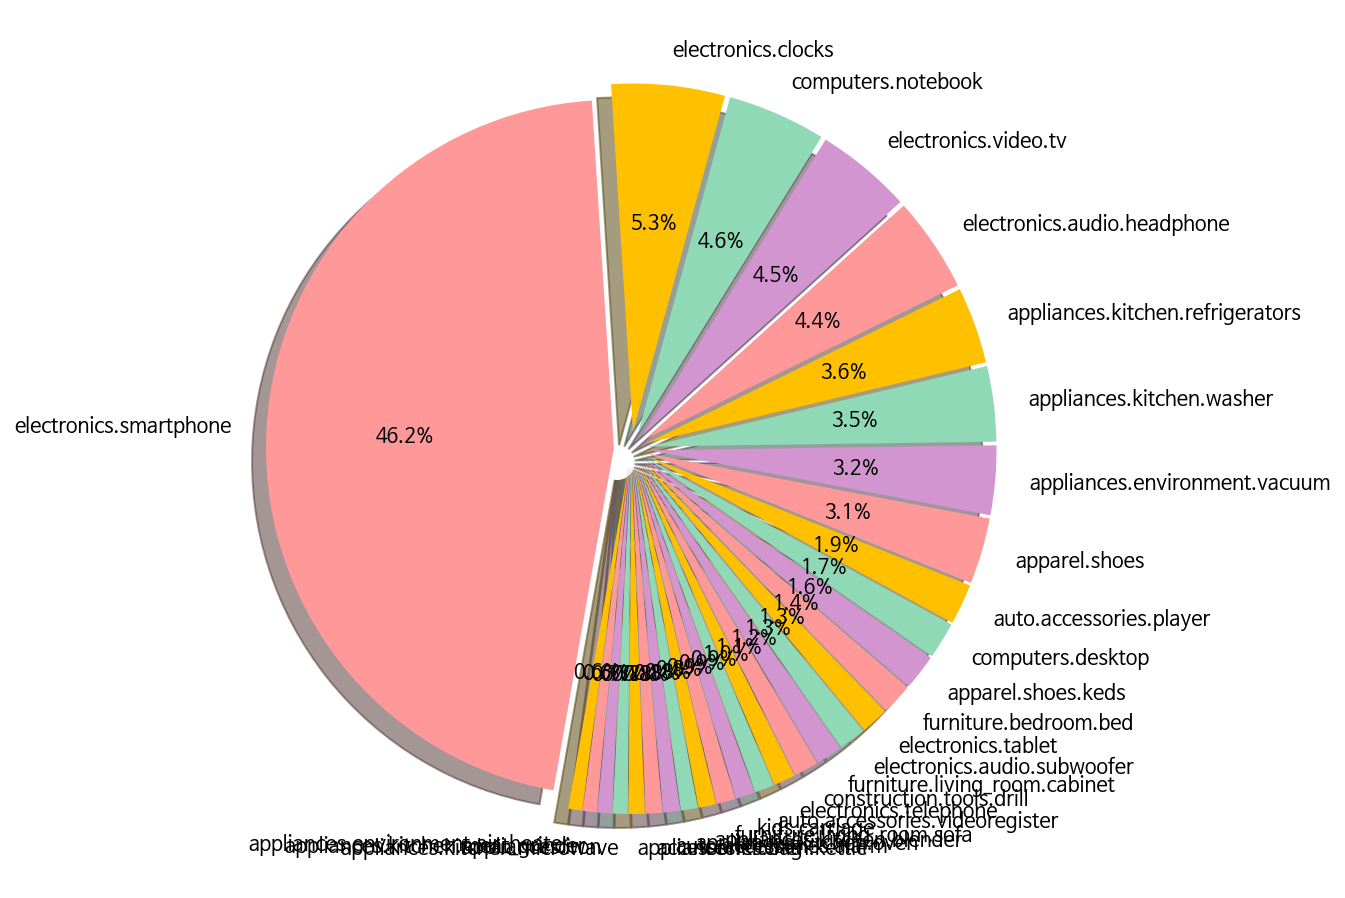

In [17]:
#상위 30개의 category_code
top_category_code = df.loc[:,'category_code'].value_counts()[:30].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

In [18]:
df['category_code'].unique()

array([nan, 'appliances.environment.water_heater',
       'furniture.living_room.sofa', 'computers.notebook',
       'electronics.smartphone', 'computers.desktop',
       'apparel.shoes.keds', 'appliances.kitchen.microwave',
       'furniture.bedroom.bed', 'electronics.video.tv',
       'appliances.kitchen.mixer', 'electronics.audio.headphone',
       'appliances.environment.air_heater', 'apparel.shoes',
       'appliances.environment.vacuum',
       'appliances.kitchen.refrigerators', 'appliances.kitchen.washer',
       'computers.peripherals.monitor', 'construction.tools.pump',
       'electronics.clocks', 'apparel.shoes.slipons',
       'furniture.living_room.chair', 'auto.accessories.compressor',
       'appliances.kitchen.meat_grinder',
       'computers.components.videocards', 'furniture.kitchen.table',
       'construction.tools.drill', 'kids.toys', 'electronics.telephone',
       'furniture.bathroom.toilet', 'auto.accessories.alarm',
       'apparel.sock', 'auto.accessories.pla

In [19]:
# RFM

df['event_time']=pd.to_datetime(df['event_time']).dt.tz_convert(None)

In [20]:
df.dtypes

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [ ]:
df2 = df.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                         user_id=('user_id',lambda x: x.unique()),
                                         Quantity = ('user_session',lambda x: x.count()),
                                         money_spent = ('price',lambda x: x.sum())).reset_index(drop=True)
df2